In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso

In [3]:
x,y = make_regression(n_samples = 100,n_features=1,n_informative = 1,n_targets = 1, noise  = 20, random_state = 13)

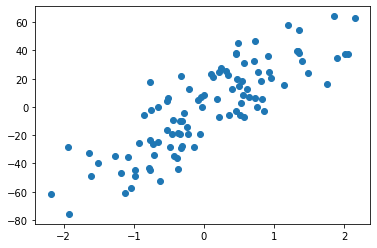

In [5]:
plt.scatter(x,y)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [9]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(80, 1) (20, 1)
(80,) (20,)


In [10]:
lr = LinearRegression()


In [11]:
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(x_test)

In [14]:
np.sqrt(mean_squared_error(y_test,y_pred))

16.522516410148462

In [15]:
r2_score(y_test,y_pred)

0.7636473690999777

In [16]:
lr.coef_

array([27.09916699])

In [17]:
lr.intercept_

-1.7618790898190366

# from lasso regration

In [18]:
l = Lasso(alpha = 1)

In [19]:
l.fit(x_train,y_train)

Lasso(alpha=1)

In [20]:
l.predict(x_test)

array([ 22.94844827, -10.35912173,  10.32576747,   7.57604298,
        33.11222277, -22.18223336,  47.30163079,   4.42344837,
       -34.42777436, -51.59458694, -27.13845012, -11.32920288,
        12.84393715,  17.79067859,   3.05249726,  12.45713919,
       -21.53564594,  34.51490916,  16.9667039 ,  32.72914785])

In [21]:
r2_score(y_test,l.predict(x_test))

0.7561227904490397

In [22]:
l.coef_

array([25.91007742])

In [23]:
l.intercept_

-1.739466636173535

<ipython-input-69-18b6220b3cda>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  l1.fit(x_train,y_train)
C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11476.293286998072, tolerance: 7.23594520815131
  model = cd_fast.enet_coordinate_descent(


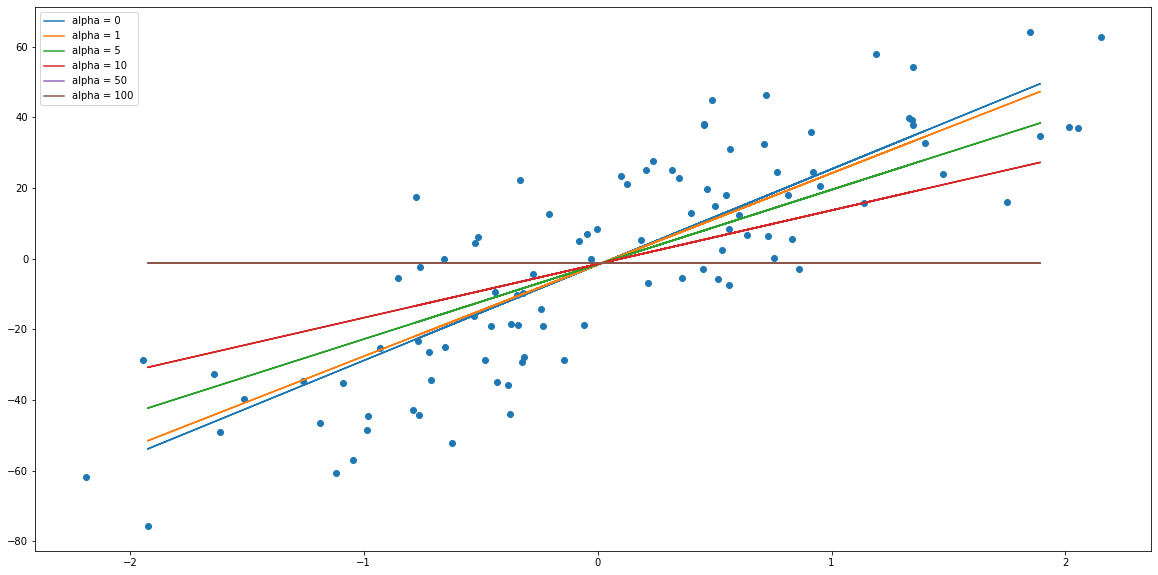

In [69]:
# Now we can change the value of alpha and see the results
plt.figure(figsize = (20,10))
plt.scatter(x,y)
alpha = [0,1,5,10,50,100]
for  i in alpha:
    l1 = Lasso(alpha = i)
    l1.fit(x_train,y_train)
    l1.predict(x_test)
    plt.plot(x_test,l1.predict(x_test), label = 'alpha = {}'.format(i))
    
    r2_score(x_test,l1.predict(x_test))
plt.legend()

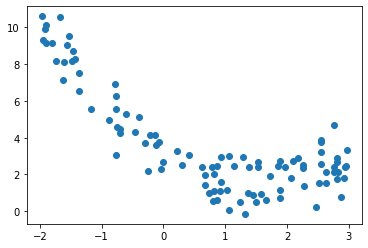

In [56]:
x1 = 5 * np.random.rand(100,1)-2
y1 = 0.7 * x1**2 - 2*x1 + 3 + np.random.randn(100,1)

plt.scatter(x1,y1)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [58]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.2)

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306.08480329893496, tolerance: 0.06624413208932897
  model = cd_fast.enet_coordinate_descent(
C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30

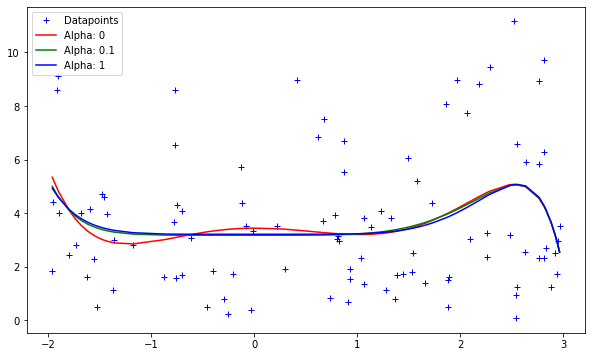

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [70]:
model = Lasso(alpha = 0.5)
model.fit(x1_train,y_train)
model.predict(x1_test)

preds = get_preds_lasso(y1_test, model.predict(x1_test), 0.1)

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34601.54085477815, tolerance: 7.23594520815131
  model = cd_fast.enet_coordinate_descent(


In [71]:
preds

array([  1.61111999,   1.61882532,   1.73061358,   1.60817354,
         1.62156339,   1.59956484, -12.04482548,   3.49703075,
         1.6232876 ,   2.44163125,   1.62161614,   0.68756779,
         3.51214993,   1.62543278,   1.62209466,   1.6220951 ,
         1.88837941,  -0.22047739,   1.62182641,   1.81091164])

In [76]:
y1_test.shape

(20, 1)

In [77]:
model.predict(x1_test).shape

(20,)

In [78]:
x1.shape

(100, 1)

In [81]:
x1_test[:, 0]

array([ 1.02973366,  0.87311142, -1.36881742,  1.06350477,  0.68012069,
        1.13516464,  2.82683637, -1.89992144, -0.76564492, -1.73352091,
        0.67035898,  1.87898944, -1.90158426, -0.87886972, -0.11776795,
       -0.25370046, -1.52336684,  2.0644553 ,  0.61872321, -1.46278335])

# Lasso Regraton

In [90]:
from sklearn.datasets import load_diabetes

In [91]:
d  = load_diabetes()

In [92]:
df = pd.DataFrame(d.data,columns = d.feature_names)

In [93]:
df['Target'] = d.target

In [94]:
df.head(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0


In [95]:
df.shape

(442, 11)

In [96]:
x2 = df.iloc[:,0:10]
y2 = df.iloc[:,-1]

In [97]:
x2.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204


In [98]:
y2.head(2)

0    151.0
1     75.0
Name: Target, dtype: float64

In [99]:
x2.shape

(442, 10)

In [100]:
y2.shape

(442,)

In [102]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.2,random_state = 2)

In [104]:
print(x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape)

(353, 10) (89, 10) (353,) (89,)


In [118]:
# Linear_regression
lr2 = LinearRegression()
lr2.fit(x2_train,y2_train)
y2_pred  = lr2.predict(x2_test)
print('r2_score =' ,r2_score(y2_test,y2_pred))
print("coefficient = ",lr2.coef_)
print("intercept = ",lr2.intercept_)
print("MSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

r2_score = 0.4399387660024644
coefficient =  [  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
intercept =  151.88334520854633
MSE =  55.62759745954073


In [120]:
#Ridge
reg = Ridge(alpha = 0.1)
reg.fit(x2_train,y2_train)
y2_reg_pred =reg.predict(x2_test)
print('r2_score =' ,r2_score(y2_test,y2_reg_pred))
print("coefficient = ",reg.coef_)
print("intercept = ",reg.intercept_)
print("MSE = ",np.sqrt(mean_squared_error(y2_test,y2_reg_pred)))


r2_score = 0.4519973816947852
coefficient =  [   6.64275308 -172.24216584  485.52387163  314.68212174  -72.93932312
  -80.59005344 -174.46651489   83.61665316  484.36328537   73.58415414]
intercept =  151.92548050708137
MSE =  55.02548302426361


In [121]:
#lasso
ls = Lasso(alpha = 0.01)
ls.fit(x2_train,y2_train)
y2_ls_pred = ls.predict(x2_test)
print('r2_score =' ,r2_score(y2_test,y2_ls_pred))
print("coefficient = ",reg.coef_)
print("intercept = ",reg.intercept_)
print("MSE = ",np.sqrt(mean_squared_error(y2_test,y2_ls_pred)))


r2_score = 0.4411227990495632
coefficient =  [   6.64275308 -172.24216584  485.52387163  314.68212174  -72.93932312
  -80.59005344 -174.46651489   83.61665316  484.36328537   73.58415414]
intercept =  151.92548050708137
MSE =  55.568764819424246


In [122]:
#elastcNet
from sklearn.linear_model import ElasticNet

In [126]:
en = ElasticNet(alpha = 0.005,l1_ratio = 0.9)

In [127]:
en.fit(x2_train,y2_train)
y2_en_pred = en.predict(x2_test)
r2_score(y2_test,en.predict(x2_test))

0.4531493801165679